In [32]:
# %conda install -c conda-forge scikit-fuzzy

In [33]:
# %pip install scikit-fuzzy

In [34]:
import numpy as np
from skfuzzy import control as ctrl
from skfuzzy import membership as mf

### Define input and output variables
| Variable  | Range       |
|-----------|------------|
| Sea Water Temperature     | 280 - 310 K |
| Turbidity     | 0 - 3 /m    |
| Windspeed  | 0 - 25 km/h    |
| Bleaching Risk Level  | 0 - 100%    |


In [35]:
# Antecedent -> input variable
swt = ctrl.Antecedent(np.arange(280, 310, 0.1), 'Sea_Water_Temperature')
turbidity = ctrl.Antecedent(np.arange(0, 3, 0.01), 'Turbidity')
windspeed = ctrl.Antecedent(np.arange(0, 25, 0.1), 'Windspeed')

# Consequent -> output variable
bleaching_risk = ctrl.Consequent(np.arange(0, 100, 0.1), 'Bleaching_Risk_Level')

### Define Membership Function

Sea Water Temperature

| Linguistic Value | Fit Vector               |
| ---------------- | ------------------------ |
| Low              | (1/280, 1/290, 0/296) |
| Moderate         | (0/294, 1/298, 0/301)    |
| High             | (0/299, 1/301.5, 0/303)  |
| Extreme          | (0/302, 1/303.2, 1/310)  |


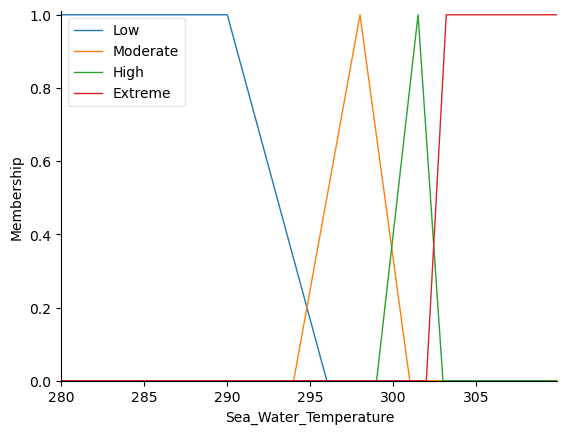

In [36]:
swt['Low'] = mf.trapmf(swt.universe, [280, 280, 290, 296])
swt['Moderate'] = mf.trimf(swt.universe, [294, 298, 301])
swt['High'] = mf.trimf(swt.universe, [299, 301.5, 303])
swt['Extreme'] = mf.trapmf(swt.universe, [302, 303.2, 310, 310])

swt.view()

Turbidity
| Linguistic Value | Fit Vector            |
| ---------------- | --------------------- |
| Low              | (1/0, 1/0.1, 0/0.5)   |
| Moderate         | (0/0.3, 1/0.6, 0/0.9) |
| High             | (0/0.7, 1/1.0, 1/3)   |


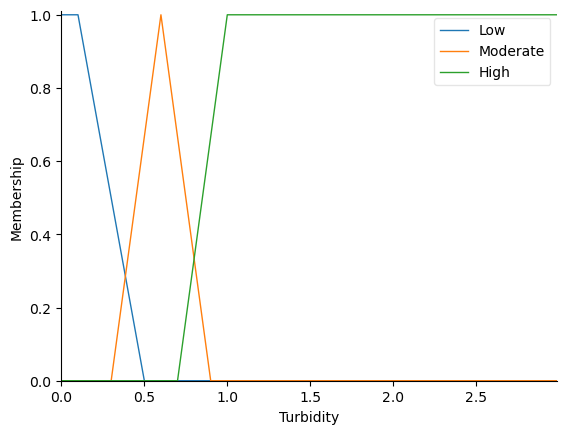

In [37]:
turbidity['Low'] = mf.trapmf(turbidity.universe, [0, 0, 0.1, 0.5])
turbidity['Moderate'] = mf.trimf(turbidity.universe, [0.3, 0.6, 0.9])
turbidity['High'] = mf.trapmf(turbidity.universe, [0.7, 1.0, 3, 3])

turbidity.view()

Windspeed
| Linguistic Value | Fit Vector        |
| ---------------- | ----------------- |
| Calm             | (1/0, 1/0, 0/5)   |
| Moderate         | (0/3, 1/7, 0/10)  |
| Strong           | (0/8, 1/12, 1/25) |


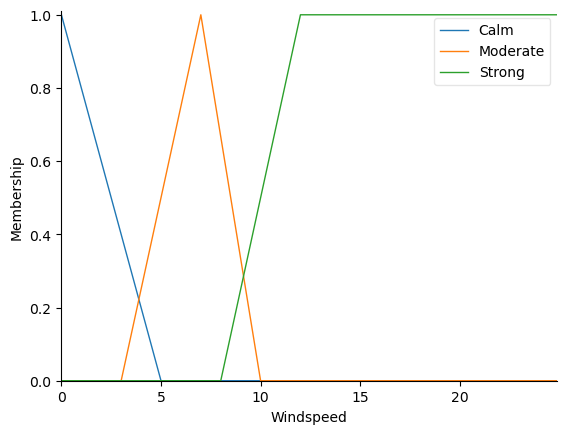

In [38]:
windspeed['Calm'] = mf.trapmf(windspeed.universe, [0, 0, 0, 5])
windspeed['Moderate'] = mf.trimf(windspeed.universe, [3, 7, 10])
windspeed['Strong'] = mf.trapmf(windspeed.universe, [8, 12, 25, 25])

windspeed.view()

Bleaching Risk Level
| Linguistic Value | Fit Vector          |
| ---------------- | ------------------- |
| Low              | (1/0, 1/15, 0/25)   |
| Moderate         | (0/20, 1/40, 0/60)  |
| High             | (0/50, 1/70, 0/85)  |
| Severe           | (0/80, 1/90, 1/100) |


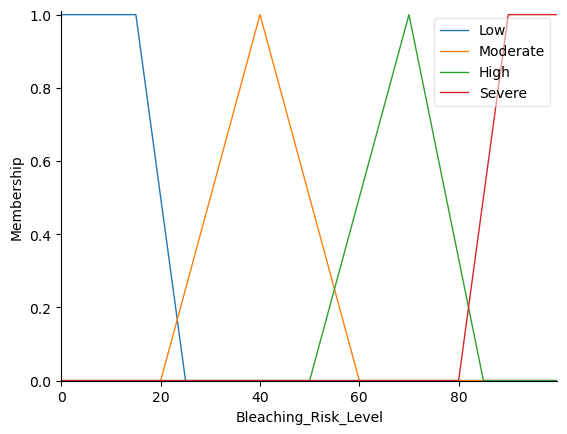

In [39]:
bleaching_risk['Low'] = mf.trapmf(bleaching_risk.universe, [0, 0, 15, 25])
bleaching_risk['Moderate'] = mf.trimf(bleaching_risk.universe, [20, 40, 60])
bleaching_risk['High'] = mf.trimf(bleaching_risk.universe, [50, 70, 85])
bleaching_risk['Severe'] = mf.trapmf(bleaching_risk.universe, [80, 90, 100, 100])

bleaching_risk.view()